# Portfolio Optimization using Genetic Algorithm

## Data collection

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import tqdm
from datetime import date
from functools import reduce

In [ ]:
# For US market, use yahoo finance
df = yf.download('MRF.NS','2015-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = pd.read_csv('hist_data.csv')
df.head()

,Unnamed: 0,Date,ASHOKLEY,M&M,MARUTI,MRF,TATAMOTORS,TVSMOTOR,AXISBANK,BANKBARODA,...,HINDZINC,JSWSTEEL,SAIL,TATASTEEL,AUROPHARMA,BIOCON,CIPLA,DRREDDY,SUNPHARMA,ZYDUSLIFE
0,0,01-01-2015,42.241730,562.183472,3066.699463,37475.42578,491.429077,261.763153,487.250488,198.216980,...,64.015701,88.316498,69.517372,14.133615,536.587647,68.048576,597.938354,2960.148926,771.707031,285.227570
1,1,02-01-2015,43.379005,556.548157,3084.002930,37683.51563,504.591034,252.237701,498.147156,200.632812,...,65.193771,88.585777,69.601372,14.353773,539.158508,68.640938,599.603455,2970.198975,775.508362,287.996735
2,2,05-01-2015,46.953304,553.730530,3164.967529,37964.77734,516.421997,255.491394,501.295044,200.577896,...,64.319710,88.374496,69.475365,14.561698,538.896545,68.736984,602.315247,2902.891602,775.977600,300.692200
3,3,06-01-2015,45.937878,550.640259,3116.728516,36961.02734,494.337555,252.803528,483.376160,193.906906,...,63.939690,85.151390,66.073013,13.855803,517.877869,66.407608,584.569275,2826.502197,758.895264,293.756134
4,4,07-01-2015,48.456142,556.320862,3155.742188,36883.12109,486.893860,262.470551,482.988678,195.224655,...,62.381580,83.838120,65.358932,13.590216,526.090149,64.734604,582.285644,2802.207275,760.068543,291.756683


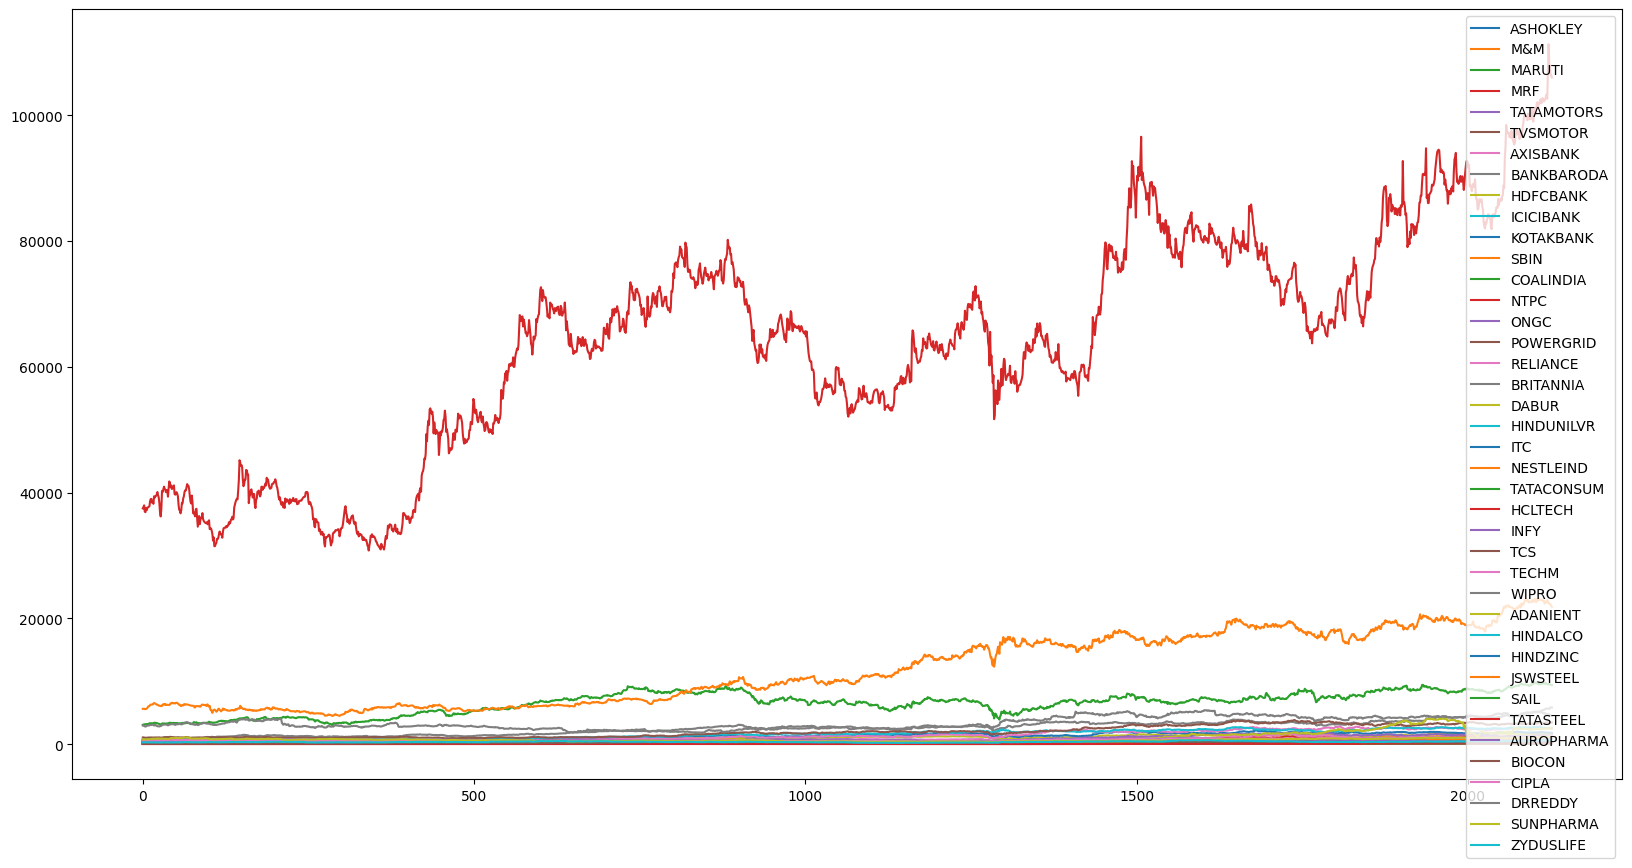

In [ ]:
# Plot the close price of the AAPL
df.plot(figsize=(20, 10))
plt.show()

In [ ]:
ticker_list = ['TITAN.NS', 'ADANIPORTS.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'BAJAJFINSV.NS', 'LT.NS','BPCL.NS','UPL.NS','DIVISLAB.NS','ULTRACEMCO.NS']

# fetch data from 1 Jan, 2015 to Present (10 Aug, 2023)
data = yf.download(ticker_list,'2015-1-1', '2015-1-19')['Adj Close']

[*********************100%%**********************]  10 of 10 completed


In [ ]:
data.head()

,ADANIPORTS.NS,BAJAJFINSV.NS,BPCL.NS,DIVISLAB.NS,EICHERMOT.NS,GRASIM.NS,LT.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS
Date,,,,,,,,,,
2015-01-01,304.542145,127.979645,136.083496,801.250854,1334.235352,501.345276,863.036682,360.733795,2579.385742,205.894745
2015-01-02,304.351532,126.890442,134.044998,804.670776,1318.464722,515.077881,881.239685,363.583252,2656.501221,212.313889
2015-01-05,308.592499,125.204399,134.304977,799.827759,1324.461792,517.015503,893.499573,366.527557,2661.926514,208.365967
2015-01-06,306.734100,122.309776,132.952896,768.520447,1289.961304,497.300659,863.697021,353.990234,2587.233398,198.270142
2015-01-07,306.019348,122.205345,134.159348,757.273743,1307.795044,503.555450,861.629822,355.794830,2577.012451,194.713959


In [ ]:
data.tail()

,ADANIPORTS.NS,BAJAJFINSV.NS,BPCL.NS,DIVISLAB.NS,EICHERMOT.NS,GRASIM.NS,LT.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS
Date,,,,,,,,,,
2015-01-12,313.024139,126.099632,140.701431,783.278992,1298.856323,506.215118,880.981323,357.884369,2616.005859,199.264633
2015-01-13,307.830109,127.964729,139.276550,791.358276,1293.742432,522.541138,872.540222,353.515320,2730.516357,207.793350
2015-01-14,315.692627,124.756775,135.563477,782.819946,1296.749634,525.554260,871.678833,352.945465,2818.045898,215.900146
2015-01-15,315.073181,128.223358,137.903656,778.367188,1322.424805,540.487793,903.663330,357.029572,2986.808350,218.491928
2015-01-16,315.311432,126.094673,137.144409,785.964417,1341.871460,535.824280,914.028198,367.762329,2974.262451,223.102844


In [ ]:
data.to_csv("extra.csv")

## Part 2

Lets consider year 2021 for finding historical return, covariance and train GA on it. Later on finding weights we will allot assets in 2022 for testing

In [ ]:
df['year'] = df['Date']

for i in range(len(df)):
  df['year'].iloc[i] = df['Date'].iloc[i].split('-')[2]

In [ ]:
df21 = df[df['year'] == '2021']
df22 = df[df['year'] == '2022']
print(df21.shape, df22.shape)

(248, 43) (248, 43)


In [ ]:
# return in 1 year from 1 Jan to Dec 31.
# We are dropping Date and year column for finding return

hist_return = df21.iloc[-1][2:-1].values - df21.iloc[0][2:-1].values

In [ ]:
hist_return

array([23.396415739999995, 109.40722659999994, -212.70605499999965,
       -2621.92968999999, 294.9806366, 137.5134278, 54.55462650000004,
       16.451995850000003, 59.117676000000074, 209.44268799999998,
       -196.6799309999999, 177.338501, 22.429771399999993,
       30.527824390000006, 49.678680400000005, 62.45741269999999,
       385.8614499999999, 103.97167899999977, 50.05633540000008,
       4.093993999999839, 13.833190900000005, 1434.6484299999975,
       142.68383790000007, 365.1640621, 621.0935059999999,
       805.7458499999998, 779.5814211999999, 324.0843505, 1216.8906248,
       236.6668243, 66.15269470000001, 256.11413580000004, 34.93561552,
       20.76679229, -184.65289299999995, -99.76934819999997,
       119.47967529999994, -280.4526369999994, 250.55895999999996,
       10.160949700000003], dtype=object)

In [ ]:
df215 = df21[['TATAMOTORS','ICICIBANK','RELIANCE','NESTLEIND','INFY']]

In [ ]:
df215.head()

,TATAMOTORS,ICICIBANK,RELIANCE,NESTLEIND,INFY
1480,185.920547,514.302124,1975.180054,17891.82813,1177.970825
1481,190.705627,518.397095,1978.509277,17821.28320,1203.951782
1482,192.599716,523.808228,1953.912720,17996.12305,1209.138550
1483,194.792877,533.021790,1902.384155,17954.42383,1198.203979
1484,196.138702,527.561890,1899.303467,17578.22656,1179.559570


In [ ]:
df215.tail()

,TATAMOTORS,ICICIBANK,RELIANCE,NESTLEIND,INFY
1723,469.686127,719.686646,2363.135254,18930.88867,1778.479004
1724,478.708038,719.491150,2391.200684,18982.52734,1799.302490
1725,474.521057,719.393372,2395.288330,19026.31641,1796.967651
1726,468.938446,719.393372,2352.018799,19033.08594,1803.924683
1727,480.901184,723.744812,2361.041504,19326.47656,1799.064331


In [ ]:
hist_return = (df215.iloc[-1].values - df215.iloc[0].values)/(df215.iloc[0].values)
hist_return

array([1.58659514, 0.40723668, 0.19535508, 0.08018456, 0.52725712])

In [ ]:
def chromosome(n):
    ''' Generates set of random numbers whose sum is equal to 1
        Input: Number of stocks.
        Output: Array of random numbers'''
    ch = np.random.rand(n)
    return ch / sum(ch)

In [ ]:
# one chromosome = one instance of weight allocation
child = chromosome(5)
print(child, sum(child))

[0.261139   0.27236302 0.10227882 0.19389153 0.17032763] 1.0000000000000002


In [ ]:
n = 5           # Number of stocks
pop_size = 100  # initial population

population = np.array([chromosome(n) for _ in range(pop_size)])
print(population.shape)
print(population)

(100, 5)
[[0.47536509 0.04735673 0.16868012 0.04401785 0.26458021]
 [0.25144061 0.07378877 0.2280752  0.08600704 0.36068838]
 [0.21688976 0.26549209 0.25503851 0.21041804 0.0521616 ]
 [0.32563508 0.16014079 0.29973056 0.08836354 0.12613004]
 [0.29791003 0.11882972 0.14424347 0.31941343 0.11960336]
 [0.15743538 0.30385595 0.20802142 0.32664978 0.00403747]
 [0.34789063 0.0340818  0.03372615 0.11956175 0.46473967]
 [0.15391278 0.20094249 0.16237589 0.20491649 0.27785235]
 [0.08102934 0.12372967 0.38933475 0.36294867 0.04295758]
 [0.15506704 0.20127099 0.11646582 0.0922688  0.43492735]
 [0.17130769 0.36104863 0.19702614 0.25421342 0.01640411]
 [0.30810557 0.22180399 0.05729979 0.24387137 0.16891928]
 [0.31562851 0.1846101  0.36124398 0.08010398 0.05841343]
 [0.11355044 0.36198648 0.20855862 0.31451179 0.00139266]
 [0.09101856 0.26167853 0.27688493 0.12221909 0.24819888]
 [0.40983656 0.1169085  0.00549069 0.3057034  0.16206085]
 [0.18131191 0.16973674 0.01992231 0.30199109 0.32703794]
 [0.1

In [ ]:
# make new dataframe of returns

dfr215 = pd.DataFrame(columns = df215.columns)

for i in range(len(df215)):
  if i > 0:
    dfr215 = dfr215.append((df215.iloc[i][0:] - df215.iloc[i-1][0:]) / df215.iloc[i-1][0:], ignore_index=True)

In [ ]:
dfr215.head()

,TATAMOTORS,ICICIBANK,RELIANCE,NESTLEIND,INFY
0,0.025737,0.007962,0.001686,-0.003943,0.022056
1,0.009932,0.010438,-0.012432,0.009811,0.004308
2,0.011387,0.017590,-0.026372,-0.002317,-0.009043
3,0.006909,-0.010243,-0.001619,-0.020953,-0.015560
4,0.007116,0.001756,0.011799,0.009872,0.039575


In [ ]:
# Volatility of one stock
dfr215['INFY'].std()

0.013148990463247806

In [ ]:
dfr215['RELIANCE'].std()

0.016346259144916494

In [ ]:
dfr215.mean()

TATAMOTORS    0.004350
ICICIBANK     0.001572
RELIANCE      0.000855
NESTLEIND     0.000375
INFY          0.001802
dtype: float64

In [ ]:
# Covariance matrix

cov_hist_return = dfr215.cov()
print(cov_hist_return)

for i in range(5):
    cov_hist_return.iloc[i][i] = 0
cov_hist_return

            TATAMOTORS  ICICIBANK  RELIANCE  NESTLEIND      INFY
TATAMOTORS    0.001028   0.000212  0.000172   0.000033  0.000108
ICICIBANK     0.000212   0.000385  0.000099   0.000022  0.000061
RELIANCE      0.000172   0.000099  0.000267   0.000037  0.000062
NESTLEIND     0.000033   0.000022  0.000037   0.000127  0.000048
INFY          0.000108   0.000061  0.000062   0.000048  0.000173


,TATAMOTORS,ICICIBANK,RELIANCE,NESTLEIND,INFY
TATAMOTORS,0.000000,0.000212,0.000172,0.000033,0.000108
ICICIBANK,0.000212,0.000000,0.000099,0.000022,0.000061
RELIANCE,0.000172,0.000099,0.000000,0.000037,0.000062
NESTLEIND,0.000033,0.000022,0.000037,0.000000,0.000048
INFY,0.000108,0.000061,0.000062,0.000048,0.000000


(i,i)th cell represents variance (square of volatility / std)

In [ ]:
# volatility of each stock
hist_vol = dfr215.std()
hist_vol

TATAMOTORS    0.032064
ICICIBANK     0.019628
RELIANCE      0.016346
NESTLEIND     0.011275
INFY          0.013149
dtype: float64

In [ ]:
hist_std = hist_vol.values
hist_std

array([0.03206444, 0.019628  , 0.01634626, 0.01127506, 0.01314899])

In [ ]:
def mean_portfolio_return(child):
    return np.sum(np.multiply(child, hist_return))

In [ ]:
mean_portfolio_return(population[0])

0.9494812097529839

In [ ]:
# Portfolio variance

def var_portfolio_return(child):
    # Add variances
    pvar = np.sum(np.multiply(child, hist_std)**2)

    # Add covariances. Note (i,i)th cell = 0
    for i in range(5):
        for j in range(5):
            pvar += cov_hist_return.iloc[i][j] * child[i] * child[j]

    return pvar

In [ ]:
var_portfolio_return(population[0])

0.00032913333107402584

In [ ]:
# Risk free return rate

rf = 0.0697

In [ ]:
# Customizable fitness function
# Currently sharpe ratio, but can keep sortino, etc

def fitness_fuction(child):
    ''' This will return the Sharpe ratio for a particular portfolio.
        Input: A child/chromosome (1D Array)
        Output: Sharpe Ratio value (Scalar)'''
    return (mean_portfolio_return(child) - rf) / np.sqrt(var_portfolio_return(child))

In [ ]:
fitness_fuction(population[0])

48.4940827881881

In [ ]:
mean_portfolio_return(population[0])

0.9494812097529839

In [ ]:
def Select_elite_population(population, frac=0.3):
    ''' Select elite population from the total population based on fitness function values.
        Input: Population and fraction of population to be considered as elite.
        Output: Elite population.'''
    population = sorted(population,key = lambda x: fitness_fuction(x), reverse=True)
    percentage_elite_idx = int(np.floor(len(population)* frac))
    return population[:percentage_elite_idx]

def mutation(parent):
    ''' Randomy choosen elements of a chromosome are swapped
        Input: Parent
        Output: Offspring (1D Array)'''
    child = parent.copy()
    n = np.random.choice(range(5),2)
    while (n[0] == n[1]):
        n = np.random.choice(range(5),2)
    child[n[0]], child[n[1]] = child[n[1]],child[n[0]]
    return child

def Heuristic_crossover(parent1,parent2):
    ''' The oﬀsprings are created according to the equation:
            Off_spring A = Best Parent  + β ∗ ( Best Parent − Worst Parent)
            Off_spring B = Worst Parent - β ∗ ( Best Parent − Worst Parent)
                Where β is a random number between 0 and 1.
        Input: 2 Parents
        Output: 2 Children (1d Array)'''
    ff1 = fitness_fuction(parent1)
    ff2 = fitness_fuction(parent2)
    diff = parent1 - parent2
    beta = np.random.rand()
    if ff1 > ff2:
        child1 = parent1 + beta * diff
        child2 = parent2 - beta * diff
    else:
        child2 = parent1 + beta * diff
        child1 = parent2 - beta * diff
    return child1, child2

def Arithmetic_crossover(parent1,parent2):
    ''' The oﬀsprings are created according to the equation:
            Off spring A = α ∗ Parent1 + (1 −α) ∗ Parent2
            Off spring B = (1 −α) ∗ Parent1 + α ∗ Parent2

                Where α is a random number between 0 and 1.
        Input: 2 Parents
        Output: 2 Children (1d Array)'''
    alpha = np.random.rand()
    child1 = alpha * parent1 + (1-alpha) * parent2
    child2 = (1-alpha) * parent1 + alpha * parent2
    return child1, child2

In [ ]:
def next_generation(pop_size, elite, crossover=Heuristic_crossover):
    ''' Generates new population from elite population with mutation probability as 0.4 and crossover as 0.6.
        Over the final stages, mutation probability is decreased to 0.1.
        Input: Population Size and elite population.
        Output: Next generation population (2D Array).'''
    new_population = []
    elite_range = range(len(elite))

    while len(new_population) < pop_size:
        # In the final stages mutation frequency is decreased.
        if len(new_population) > 2*pop_size/3:
            mutate_or_crossover = np.random.choice([0, 1], p = [0.9, 0.1])
        else:
            mutate_or_crossover = np.random.choice([0, 1], p = [0.4, 0.6])

        if mutate_or_crossover:
            indx = np.random.choice(elite_range)
            new_population.append(mutation(elite[indx]))
        else:
            p1_idx,p2_idx = np.random.choice(elite_range,2)
            c1,c2 = crossover(elite[p1_idx], elite[p2_idx])
            chk = 0
            for gene in range(5):
                if c1[gene] < 0:
                    chk += 1
                else:
                    chk += 0
            if chk > 0:
                p1_idx, p2_idx = np.random.choice(elite_range,2)
                c1, c2 = crossover(elite[p1_idx],elite[p2_idx])
            new_population.extend([c1,c2])
    return new_population

In [ ]:
# Iterate the process

n = 5 # Number of stocks
pop_size = 100 # initial population = 100

# Initial population
population = np.array([chromosome(n) for _ in range(pop_size)])

# Get initial elite population
elite = Select_elite_population(population)

iteration = 0
Expected_returns = 0
Expected_risk = 1

while (Expected_returns < 0.30 and Expected_risk > 0.0005) or iteration <= 40:
    print('Iteration:', iteration)
    population = next_generation(100, elite)
    elite = Select_elite_population(population)
    Expected_returns = mean_portfolio_return(elite[0])
    Expected_risk = var_portfolio_return(elite[0])
    print('Expected returns of {} with risk of {}\n'.format(Expected_returns, Expected_risk))
    iteration += 1

Iteration: 0
Expected returns of 0.9790236283657583 with risk of 0.00030465307576787645

Iteration: 1
Expected returns of 1.0376315474597255 with risk of 0.00034057175270002217

Iteration: 2
Expected returns of 1.29027135373924 with risk of 0.0005206016305006718

Iteration: 3
Expected returns of 1.628902207235754 with risk of 0.0008386848391403856

Iteration: 4
Expected returns of 1.2321281672339248 with risk of 0.000462699998154363

Iteration: 5
Expected returns of 1.3810552079646634 with risk of 0.0005871435920478572

Iteration: 6
Expected returns of 1.3699996626752777 with risk of 0.0005735066745889681

Iteration: 7
Expected returns of 1.6594997127967086 with risk of 0.0008323878530376946

Iteration: 8
Expected returns of 1.5815907741925392 with risk of 0.0007502977302875663

Iteration: 9
Expected returns of 1.4390554855673228 with risk of 0.0006112840615570996

Iteration: 10
Expected returns of 1.4485726392471547 with risk of 0.0006209526882864562

Iteration: 11
Expected returns of

In [ ]:
print('Portfolio of stocks after all the iterations:\n')
[print(df215.columns[i],':',elite[0][i]) for i in list(range(5))]

Portfolio of stocks after all the iterations:

TATAMOTORS : 0.6886879452896034
ICICIBANK : -0.0037213659916172735
RELIANCE : -0.3771412253825682
NESTLEIND : -0.42800156868941225
INFY : 1.1201762147739922


[None, None, None, None, None]

In [ ]:
print('\nExpected returns of {} with risk of {}\n'.format(Expected_returns, Expected_risk))


Expected returns of 1.5737787828106493 with risk of 0.0007352105405081522



In [ ]:
fitness_fuction(elite[0])

55.47083745500684